**Name: Sujal Kale**

**Project: Build a model with high accuracy to predict whether patients in the dataset have diabetes**

### Loading required library packages ###

In [32]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
import seaborn as sns
from sklearn.metrics import accuracy_score, mean_squared_error, classification_report, confusion_matrix, precision_score, recall_score, roc_curve, auc 
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC 
from sklearn.naive_bayes  import GaussianNB
from sklearn.preprocessing  import StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier

#### Reading and Expolring the given dataset ####

In [33]:
data=pd.read_csv('/workspaces/codespaces-jupyter/data/health care diabetes (1).csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**Checking the number of rows and columns**

In [34]:
data.shape

(768, 9)

Dataset Overview

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Summary of the Diaberes dataset

In [36]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


**Data Preprocessing**

Identifying the mean of the features


In [37]:
print(data['Glucose'].mean())
print(data['BloodPressure'].mean())
print(data['SkinThickness'].mean())
print(data['Insulin'].mean())

120.89453125
69.10546875
20.536458333333332
79.79947916666667


Finding no. of rows which has the null values

In [38]:
print('Glucose-', len(data['Glucose'][data['Glucose']==0]))
print('BloodPressure-', len(data['BloodPressure'][data['BloodPressure']==0]))
print('SkinThickness-', len(data['SkinThickness'][data['SkinThickness']==0]))
print('Insulin-', len(data['Insulin'][data['Insulin']==0]))

Glucose- 5
BloodPressure- 35
SkinThickness- 227
Insulin- 374


Finding the null value percentage

In [39]:
selected_columns = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin']
null_percentage = (data[selected_columns]==0).mean() * 100

print("The percentage of the null values for each colums are: ")
print(null_percentage)

The percentage of the null values for each colums are: 
Glucose           0.651042
BloodPressure     4.557292
SkinThickness    29.557292
Insulin          48.697917
dtype: float64


Replacing the null values with the mean


In [40]:
data['Glucose']=data['Glucose'].replace([0], [data['Glucose'].mean()])
data['BloodPressure']=data['BloodPressure'].replace([0], [data['BloodPressure'].mean()])
data['SkinThickness']=data['SkinThickness'].replace([0], [data['SkinThickness'].mean()])
data['Insulin']=data['Insulin'].replace([0], [data['Insulin'].mean()])

Checking the null values and displaying them

In [41]:
null_percentage_treated = (data[selected_columns]==0).mean() * 100
print("Percentage of null values of each column afer the null value treatment are: ")
print(null_percentage_treated)

Percentage of null values of each column afer the null value treatment are: 
Glucose          0.0
BloodPressure    0.0
SkinThickness    0.0
Insulin          0.0
dtype: float64


Detecting Outliers and thier Treatment

In [42]:
columns=data[selected_columns]

Displaying boxplots for numeric columns to visualise outliers

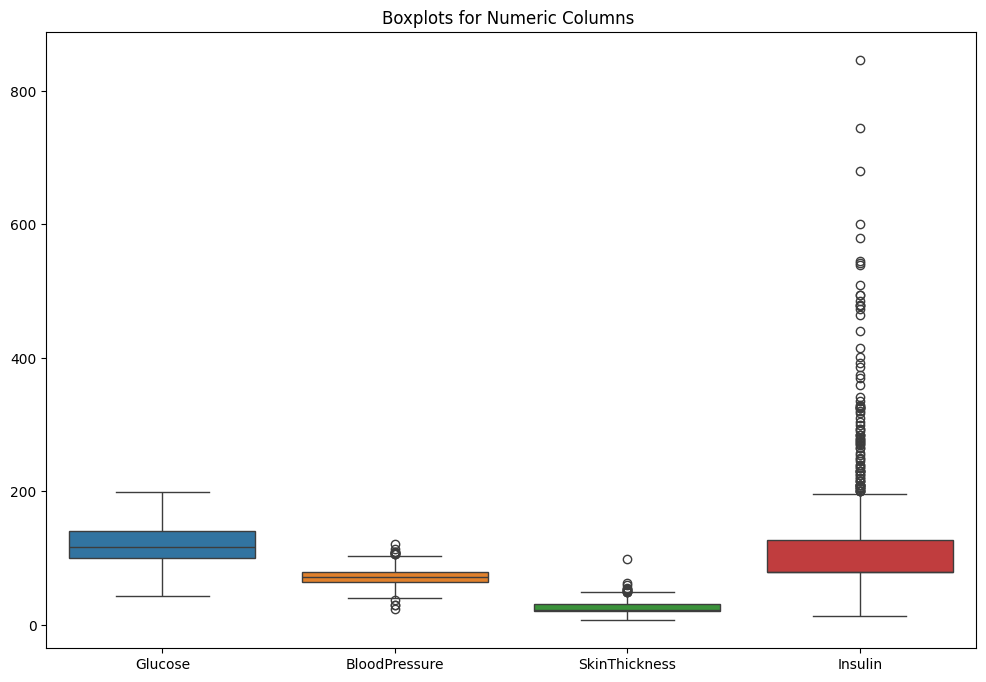

In [43]:
plt.figure(figsize=(12,8))
sns.boxplot(data=columns)
plt.title("Boxplots for Numeric Columns ")
plt.show()

In [44]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,31.992578,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,7.884160,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Now we find the outlier count in the selected columns

In [45]:
def find_outlier_iqr(data, column_name):
    Q1 = data[column_name].quantile(0.25)
    Q3 = data[column_name].quantile(0.75)

    #Calculating the interquartile range(IQR)
    
    IQR = Q3 - Q1

    #Defining lower and upper bounds of outliers

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR 

    #Find Outliers

    outliers = data[(data[column_name] < lower_bound) | (data[column_name] > upper_bound)]

    #counting the number of outliers
    count_outliers = len(outliers)
    return count_outliers
for column_name in selected_columns:
    outlier_count = find_outlier_iqr(data, column_name)
    print(f"Number of Outliers in the '{column_name}' column: {outlier_count}")


Number of Outliers in the 'Glucose' column: 0
Number of Outliers in the 'BloodPressure' column: 14
Number of Outliers in the 'SkinThickness' column: 12
Number of Outliers in the 'Insulin' column: 89


## Outlier Treatment ##

In [46]:
sorted(data)
Q1 = data.quantile(0.20)
Q3 = data.quantile(0.80)
IQR = Q3 - Q1
print(IQR)

Pregnancies                  6.000000
Glucose                     52.000000
BloodPressure               20.000000
SkinThickness               14.463542
Insulin                     70.200521
BMI                         11.900000
DiabetesPedigreeFunction     0.467600
Age                         19.600000
Outcome                      1.000000
dtype: float64


In [47]:
data_cleared_iqr = data[~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)]
data_cleared_iqr
print(data_cleared_iqr.shape)
print(data.shape)

(678, 9)
(768, 9)


In [48]:
data_cleared_iqr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
5,5,116.0,74.0,20.536458,79.799479,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [49]:
col = data_cleared_iqr[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin']]

Checking the outliers after thier treatment using box plot

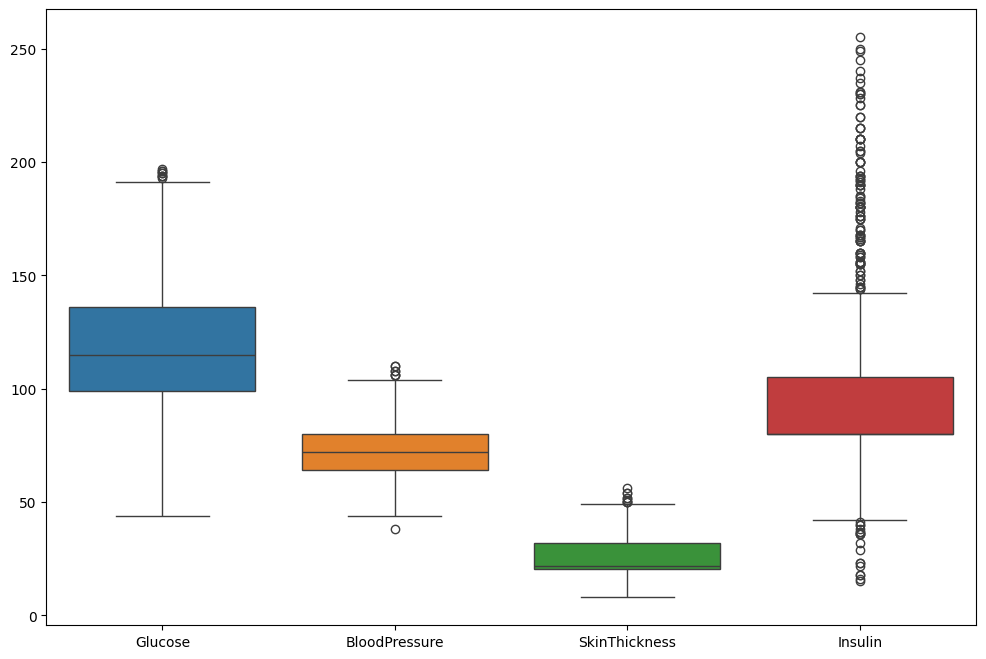

In [50]:
plt.figure(figsize=(12,8))
sns.boxplot(data=col)
plt.show()

The outliers have been reduced after the treatment